In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [91]:
wifi = "wifi.csv"
usage = "usage.csv"

wifi = pd.read_csv(wifi)
usage = pd.read_csv(usage)

In [97]:
wifi.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10362,3,Limited Free,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,40.658385,-73.887583,1.015441e+06,179163.810029,...,East New York,42,11207,305,1104,1104,0,3043490001,217,"(40.658385, -73.8875829994)"
1,10447,4,Limited Free,SPECTRUM,Elmhurst Park,Park Area,40.728838,-73.883751,1.016470e+06,204833.279032,...,Elmhurst,25,11373,404,499,499,0,0,824,"(40.7288380002, -73.8837509996)"
2,10605,3,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,194851.884952,...,Brooklyn Heights-Cobble Hill,33,11201,302,1,1,0,3002050001,1409,"(40.7014999998, -73.9943000006)"
3,9753,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,...,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.6934417997, -73.9731930998)"
4,9884,3,Free,Downtown Brooklyn,NaN,409 Fulton St.,40.692178,-73.988304,9.874935e+05,191455.769697,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,11,11,3000281,3001440001,1028,"(40.6921780001, -73.9883039999)"


In [98]:
wifi.columns

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Name', 'Location',
       'Latitude', 'Longitude', 'X', 'Y', 'Location_T', 'Remarks', 'City',
       'SSID', 'SourceID', 'Activated', 'BoroCode', 'Borough Name',
       'Neighborhood Tabulation Area Code (NTACODE)',
       'Neighborhood Tabulation Area (NTA)', 'Council Distrcit', 'Postcode',
       'BoroCD', 'Census Tract', 'BCTCB2010', 'BIN', 'BBL', 'DOITT_ID',
       'Location (Lat, Long)'],
      dtype='object')

In [99]:
wifi.drop(labels=['Borough', 'Type', 'Latitude', 'Longitude', 'X', 'Y',
                  'BoroCode','Neighborhood Tabulation Area Code (NTACODE)',
                  'BoroCD', 'Census Tract', 'BCTCB2010', 'BIN', 'BBL', 'DOITT_ID',
                  'Location (Lat, Long)'], axis=1, inplace=True)

In [100]:
wifi.head()

,OBJECTID,Provider,Name,Location,Location_T,Remarks,City,SSID,SourceID,Activated,Borough Name,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode
0,10362,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,09/09/9999,Brooklyn,East New York,42,11207
1,10447,SPECTRUM,Elmhurst Park,Park Area,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,09/09/9999,Queens,Elmhurst,25,11373
2,10605,AT&T,Hillside Park,Near Vine St and Columbia Heights,Outdoor,NaN,Brooklyn,attwifi,NaN,09/09/9999,Brooklyn,Brooklyn Heights-Cobble Hill,33,11201
3,9753,NYCHA,0,331 Myrtle Ave,Outdoor,NaN,Brooklyn,DowntownBrooklynWiFi_Fon,NaN,09/09/9999,Brooklyn,Fort Greene,35,11205
4,9884,Downtown Brooklyn,NaN,409 Fulton St.,Outdoor,NaN,Brooklyn,Downtown Brooklyn WiFi,NaN,09/09/9999,Brooklyn,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201


In [101]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 14 columns):
OBJECTID                              3319 non-null int64
Provider                              3319 non-null object
Name                                  3089 non-null object
Location                              3319 non-null object
Location_T                            3319 non-null object
Remarks                               2771 non-null object
City                                  3319 non-null object
SSID                                  3319 non-null object
SourceID                              2257 non-null object
Activated                             3319 non-null object
Borough Name                          3319 non-null object
Neighborhood Tabulation Area (NTA)    3319 non-null object
Council Distrcit                      3319 non-null int64
Postcode                              3319 non-null int64
dtypes: int64(3), object(11)
memory usage: 363.1+ KB


In [102]:
wifi.shape

(3319, 14)

In [103]:
wifi = wifi[pd.notnull(wifi['SourceID'])]
wifi.head()

,OBJECTID,Provider,Name,Location,Location_T,Remarks,City,SSID,SourceID,Activated,Borough Name,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode
1,10447,SPECTRUM,Elmhurst Park,Park Area,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,09/09/9999,Queens,Elmhurst,25,11373
7,10220,SPECTRUM,Richard Tucker Square,W 66th Street,Outdoor,3 free 10 min sessions,New York,GuestWiFi,0,09/09/9999,Manhattan,Lincoln Square,6,10023
8,11041,LinkNYC - Citybridge,qu-01-125086,32-21 BROADWAY,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-012889,06/14/2017,Queens,Astoria,22,11106
9,11631,SPECTRUM,West Harlem Piers,Pier and South Seating Area,Outdoor,3 free 10 min sessions,New York,GuestWiFi,0,09/09/9999,Manhattan,Manhattanville,7,10027
10,12500,LinkNYC - Citybridge,si-02-125476,19 SEAVIEW AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Staten Island,LinkNYC Free Wi-Fi,LINK-001752,02/28/2017,Staten Island,Old Town-Dongan Hills-South Beach,50,10304


In [104]:
wifi = wifi[wifi.SSID != 'GuestWiFi']

In [12]:
wifi.head()

,OBJECTID,Provider,Name,Location,Location_T,Remarks,City,SSID,SourceID,Activated,Borough Name,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode
8,11041,LinkNYC - Citybridge,qu-01-125086,32-21 BROADWAY,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-012889,06/14/2017,Queens,Astoria,22,11106
10,12500,LinkNYC - Citybridge,si-02-125476,19 SEAVIEW AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Staten Island,LinkNYC Free Wi-Fi,LINK-001752,02/28/2017,Staten Island,Old Town-Dongan Hills-South Beach,50,10304
12,10191,LinkNYC - Citybridge,qu-01-145954,43-40 NORTHERN BOULEVARD,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-020932,11/07/2017,Queens,Hunters Point-Sunnyside-West Maspeth,26,11101
14,11491,LinkNYC - Citybridge,mn-03-123802,237 1 AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-014015,10/06/2017,Manhattan,East Village,2,10003
15,10721,LinkNYC - Citybridge,mn-03-139455,242 EAST 10 STREET,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-008305,10/06/2017,Manhattan,East Village,2,10003


In [105]:
wifi.shape

(1914, 14)

In [106]:
wifi = wifi.rename(columns={"Activated": "Week"})

In [107]:
wifi.head()

,OBJECTID,Provider,Name,Location,Location_T,Remarks,City,SSID,SourceID,Week,Borough Name,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode
8,11041,LinkNYC - Citybridge,qu-01-125086,32-21 BROADWAY,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-012889,06/14/2017,Queens,Astoria,22,11106
10,12500,LinkNYC - Citybridge,si-02-125476,19 SEAVIEW AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Staten Island,LinkNYC Free Wi-Fi,LINK-001752,02/28/2017,Staten Island,Old Town-Dongan Hills-South Beach,50,10304
12,10191,LinkNYC - Citybridge,qu-01-145954,43-40 NORTHERN BOULEVARD,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-020932,11/07/2017,Queens,Hunters Point-Sunnyside-West Maspeth,26,11101
14,11491,LinkNYC - Citybridge,mn-03-123802,237 1 AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-014015,10/06/2017,Manhattan,East Village,2,10003
15,10721,LinkNYC - Citybridge,mn-03-139455,242 EAST 10 STREET,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-008305,10/06/2017,Manhattan,East Village,2,10003


In [108]:
usage.head()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date
0,Week of 2/29/2016,31523,161899,0.418,1.73,00:03:01.000,1022,2391,6116
1,Week of 3/7/2016,54896,216795,0.635,1.84,00:02:47.000,2216,4041,8357
2,Week of 3/14/2016,61217,285012,0.602,2.32,00:02:49.000,2587,4983,10984
3,Week of 3/21/2016,103613,381766,1.103,3.21,00:03:09.000,5223,8322,15920
4,Week of 3/28/2016,158420,540186,1.315,5.28,00:02:53.000,6235,10961,22232


In [109]:
usage.columns

Index(['Week', 'Sessions Per Week', 'Cumulative Sessions To Date',
       'Bandwidth Utilization Per Week (TB)',
       'Cumulative Bandwidth Utilization To Date (TB)',
       'Average Session Duration', 'New Subscribers Per Week',
       'Total Subscribers Per Week', 'Cumulative Subscribers To Date'],
      dtype='object')

In [110]:
usage = usage.rename(columns={"Week": "Period"})
usage.head()

,Period,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date
0,Week of 2/29/2016,31523,161899,0.418,1.73,00:03:01.000,1022,2391,6116
1,Week of 3/7/2016,54896,216795,0.635,1.84,00:02:47.000,2216,4041,8357
2,Week of 3/14/2016,61217,285012,0.602,2.32,00:02:49.000,2587,4983,10984
3,Week of 3/21/2016,103613,381766,1.103,3.21,00:03:09.000,5223,8322,15920
4,Week of 3/28/2016,158420,540186,1.315,5.28,00:02:53.000,6235,10961,22232


Text(150, 79.86, 'Christmas')

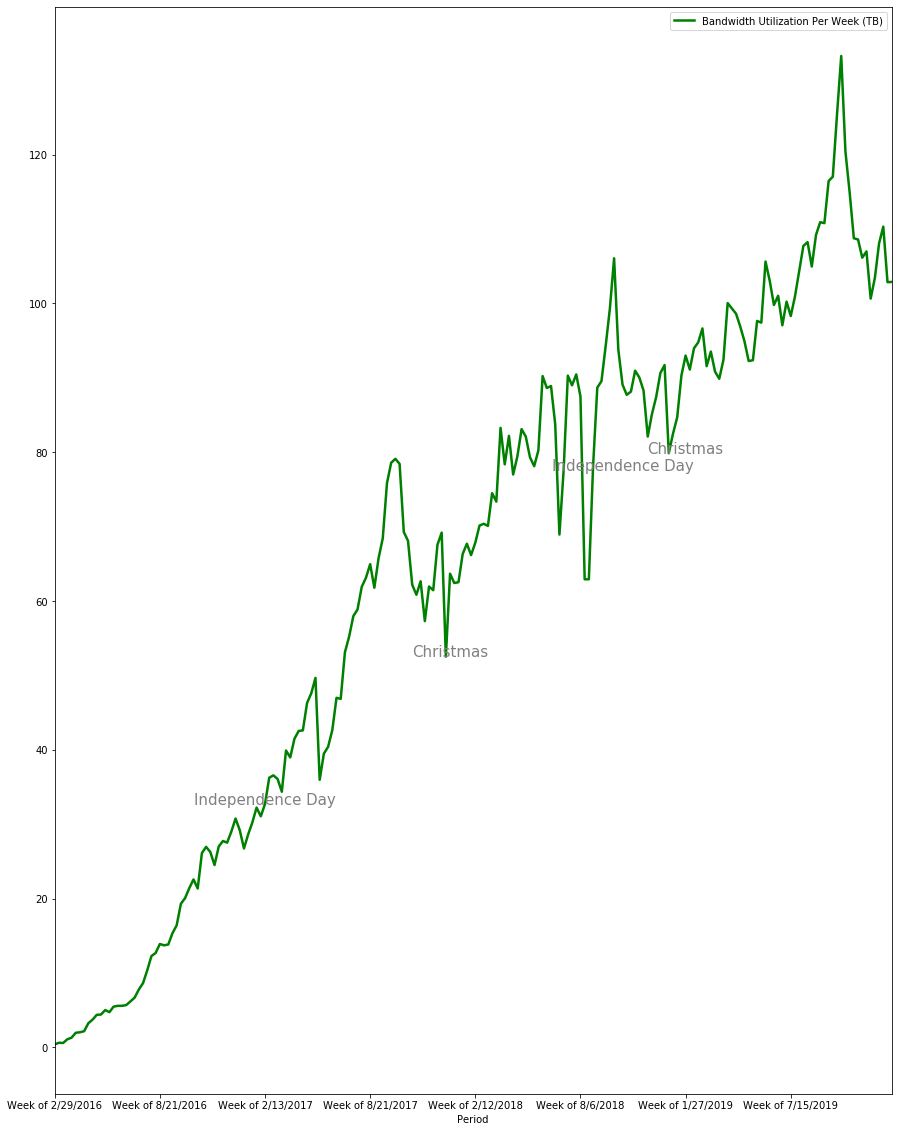

In [111]:
ax = usage.plot.line(x='Period', y='Bandwidth Utilization Per Week (TB)', 
                figsize=(15, 20), linewidth=2.5, color='green')

style = dict(size=15, color='gray')

ax.text(50, 32.72, "Independence Day",  ha='center', **style)
ax.text(135, 77.58, "Independence Day",  ha='center', **style)
ax.text(94, 52.52, "Christmas",  ha='center', **style)
ax.text(150, 79.86, "Christmas",  ha='center', **style)


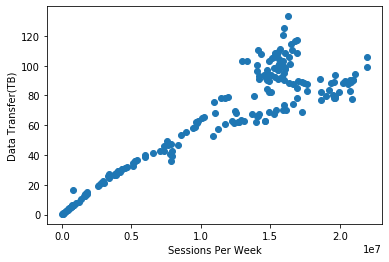

In [112]:
sessions = usage['Sessions Per Week']
data_transfer = usage['Bandwidth Utilization Per Week (TB)']
plt.scatter(sessions, data_transfer)
plt.xlabel("Sessions Per Week")
plt.ylabel("Data Transfer(TB)")
#plt.xticks(sessions, rotation=90)
plt.show()

In [116]:
r = st.pearsonr(sessions,data_transfer)[0]
print(f"The correlation coefficient between sessions and data transfer is {round(r, 2)}")

The correlation coefficient between sessions and data transfer is 0.92


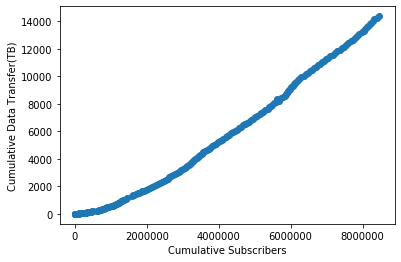

In [114]:
total_data_transfers = usage['Cumulative Bandwidth Utilization To Date (TB)']
total_subscribers = usage['Cumulative Subscribers To Date']
plt.scatter(total_subscribers, total_data_transfers)
plt.xlabel("Cumulative Subscribers")
plt.ylabel("Cumulative Data Transfer(TB)")
#plt.xticks(sessions, rotation=90)
plt.show()

In [117]:
r = st.pearsonr(total_subscribers, total_data_transfers)[0]
print(f"The correlation coefficient between sessions and data transfer is {round(r, 2)}")

The correlation coefficient between sessions and data transfer is 0.99


In [133]:
a = usage['Cumulative Bandwidth Utilization To Date (TB)'].max()
b = usage['Cumulative Subscribers To Date'].max()

c = (a / b) * 1000
print(f"Average usage of internet from 'LinkNYC Free Wi-Fi' hotspots is {round(c,2)} gigabytes. per device between January 19th 2016 - December 30th 2019" )

Average usage of internet from 'LinkNYC Free Wi-Fi' hotspots is 1.7 gigabytes. per device between January 19th 2016 - December 30th 2019


In [26]:
combined_data = pd.concat([wifi,usage], axis=1, ignore_index=False)
combined_data

,OBJECTID,Provider,Name,Location,Location_T,Remarks,City,SSID,SourceID,Week,...,Postcode,Period,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Week of 2/29/2016,31523.0,161899.0,0.418,1.73,00:03:01.000,1022.0,2391.0,6116.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Week of 3/7/2016,54896.0,216795.0,0.635,1.84,00:02:47.000,2216.0,4041.0,8357.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Week of 3/14/2016,61217.0,285012.0,0.602,2.32,00:02:49.000,2587.0,4983.0,10984.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Week of 3/21/2016,103613.0,381766.0,1.103,3.21,00:03:09.000,5223.0,8322.0,15920.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Week of 3/28/2016,158420.0,540186.0,1.315,5.28,00:02:53.000,6235.0,10961.0,22232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,11728.0,LinkNYC - Citybridge,mn-12-120461,470 WEST 157 STREET,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-010956,05/11/2017,...,10032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3314,10310.0,LinkNYC - Citybridge,qu-02-145981,43-01 48 AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-021680,03/15/2018,...,11377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3315,12845.0,LinkNYC - Citybridge,mn-08-134739,1345 E 78ST,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-000854,05/16/2016,...,10021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3317,10268.0,LinkNYC - Citybridge,bk-01-146010,145 WYTHE AVENUE,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021263,02/14/2018,...,11249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
